# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import random
import json
from datetime import datetime


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
  

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | jiwani
Processing Record 3 of Set 1 | cabo san lucas
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | wailua homesteads
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | tazacorte
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | cherepanovo
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | cidreira
Processing Record 15 of Set 1 | port mathurin
Processing Record 16 of Set 1 | colonia
Processing Record 17 of Set 1 | inhambane
Processing Record 18 of Set 1 | hasaki
Processing Record 19 of Set 1 | mangrol
Processing Record 20 of Set 1 | san isidro
Processing Record 21 of Set 1 | arraial do cabo
Processing Record 22 of Set 1 | olyokminsk
Proce

Processing Record 42 of Set 4 | lihue
Processing Record 43 of Set 4 | mumford
Processing Record 44 of Set 4 | luderitz
Processing Record 45 of Set 4 | gorontalo
Processing Record 46 of Set 4 | north bend
Processing Record 47 of Set 4 | punta arenas
Processing Record 48 of Set 4 | francistown
Processing Record 49 of Set 4 | goondiwindi
Processing Record 50 of Set 4 | margate
Processing Record 1 of Set 5 | tarauaca
Processing Record 2 of Set 5 | petropavlovsk-kamchatsky
Processing Record 3 of Set 5 | saipan
Processing Record 4 of Set 5 | weno
Processing Record 5 of Set 5 | aksuat
Processing Record 6 of Set 5 | lodeve
Processing Record 7 of Set 5 | sisimiut
Processing Record 8 of Set 5 | kingston
Processing Record 9 of Set 5 | salinopolis
Processing Record 10 of Set 5 | emerald
Processing Record 11 of Set 5 | kruisfontein
Processing Record 12 of Set 5 | hadibu
Processing Record 13 of Set 5 | pangody
Processing Record 14 of Set 5 | lake city
Processing Record 15 of Set 5 | badger
Processin

Processing Record 34 of Set 8 | nelson bay
Processing Record 35 of Set 8 | sodankyla
Processing Record 36 of Set 8 | nsanje
Processing Record 37 of Set 8 | deqen
Processing Record 38 of Set 8 | dryden
Processing Record 39 of Set 8 | siedlce
Processing Record 40 of Set 8 | as sulayyil
Processing Record 41 of Set 8 | greenland
Processing Record 42 of Set 8 | acapulco de juarez
Processing Record 43 of Set 8 | campina verde
Processing Record 44 of Set 8 | kodinsk
Processing Record 45 of Set 8 | kirsanov
Processing Record 46 of Set 8 | mus
Processing Record 47 of Set 8 | hirara
Processing Record 48 of Set 8 | san antonio de pale
Processing Record 49 of Set 8 | elverum
Processing Record 50 of Set 8 | septemvri
Processing Record 1 of Set 9 | nurota
Processing Record 2 of Set 9 | saginaw township north
City not found. Skipping...
Processing Record 3 of Set 9 | bikenibeu village
Processing Record 4 of Set 9 | almenara
Processing Record 5 of Set 9 | itaituba
Processing Record 6 of Set 9 | saint-

Processing Record 21 of Set 12 | hotan
Processing Record 22 of Set 12 | galesong
Processing Record 23 of Set 12 | zaozersk
Processing Record 24 of Set 12 | zambezi
Processing Record 25 of Set 12 | ballina
Processing Record 26 of Set 12 | les avirons
Processing Record 27 of Set 12 | kil'mez'
City not found. Skipping...
Processing Record 28 of Set 12 | kuala kangsar
Processing Record 29 of Set 12 | barauna
Processing Record 30 of Set 12 | bonanza
Processing Record 31 of Set 12 | kandyagash
Processing Record 32 of Set 12 | copala
Processing Record 33 of Set 12 | tshabong
Processing Record 34 of Set 12 | hyderabad
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,37.42,87,100,26.19,TF,2023-06-29 03:30:34
1,jiwani,25.0500,61.7417,85.21,77,88,9.98,PK,2023-06-29 03:30:35
2,cabo san lucas,22.8909,-109.9124,90.70,58,20,9.22,MX,2023-06-29 03:30:35
3,adamstown,-25.0660,-130.1015,68.54,60,99,24.02,PN,2023-06-29 03:30:35
4,grytviken,-54.2811,-36.5092,21.76,76,16,8.21,GS,2023-06-29 03:30:35


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,37.42,87,100,26.19,TF,2023-06-29 03:30:34
1,jiwani,25.0500,61.7417,85.21,77,88,9.98,PK,2023-06-29 03:30:35
2,cabo san lucas,22.8909,-109.9124,90.70,58,20,9.22,MX,2023-06-29 03:30:35
3,adamstown,-25.0660,-130.1015,68.54,60,99,24.02,PN,2023-06-29 03:30:35
4,grytviken,-54.2811,-36.5092,21.76,76,16,8.21,GS,2023-06-29 03:30:35


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

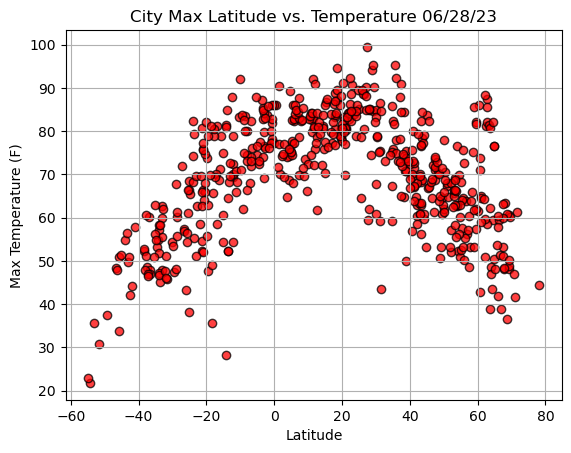

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", facecolors = "red", edgecolor = "black", alpha = 0.75)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

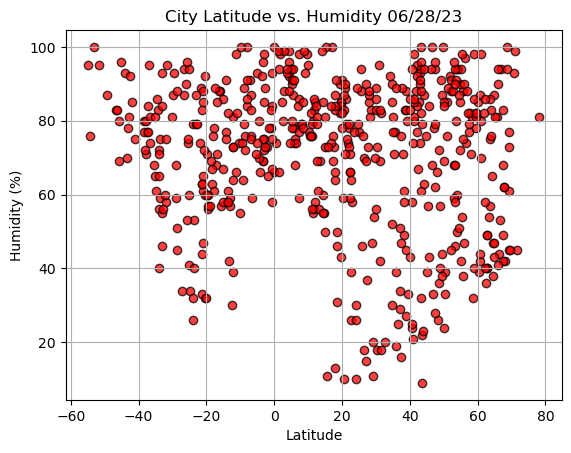

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", facecolors = "red", edgecolor = "black", alpha = 0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

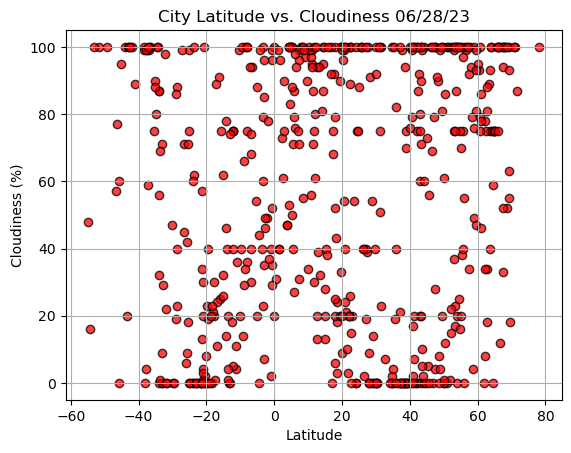

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", facecolors = "red", edgecolor = "black", alpha = 0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

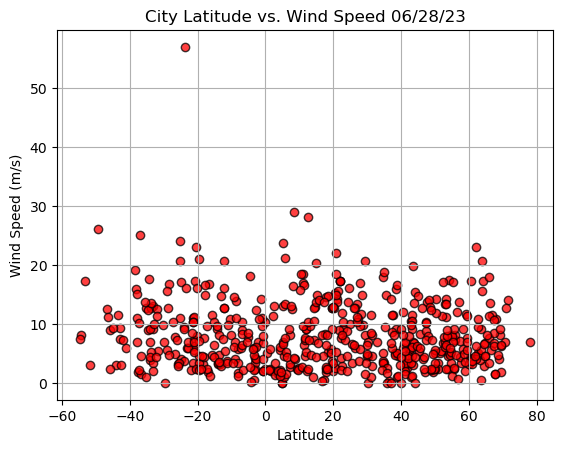

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", facecolors = "red", edgecolor = "black", alpha = 0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    plt.annotate(line_equation, text_coordinates, fontsize = 20, color="black")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f'r:{r_value:.4f}')

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jiwani,25.0500,61.7417,85.21,77,88,9.98,PK,2023-06-29 03:30:35
2,cabo san lucas,22.8909,-109.9124,90.70,58,20,9.22,MX,2023-06-29 03:30:35
5,bethel,41.3712,-73.4140,71.47,80,100,3.44,US,2023-06-29 03:30:36
6,iqaluit,63.7506,-68.5145,38.93,75,75,9.22,CA,2023-06-29 03:29:27
7,wailua homesteads,22.0669,-159.3780,82.83,78,20,17.27,US,2023-06-29 03:30:36


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,37.42,87,100,26.19,TF,2023-06-29 03:30:34
3,adamstown,-25.0660,-130.1015,68.54,60,99,24.02,PN,2023-06-29 03:30:35
4,grytviken,-54.2811,-36.5092,21.76,76,16,8.21,GS,2023-06-29 03:30:35
8,avarua,-21.2078,-159.7750,80.65,83,13,3.44,CK,2023-06-29 03:30:36
10,hermanus,-34.4187,19.2345,54.81,83,100,17.56,ZA,2023-06-29 03:28:37


###  Temperature vs. Latitude Linear Regression Plot

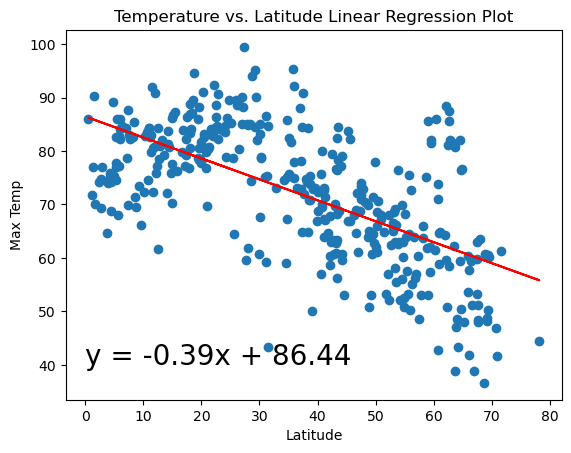

r:-0.6321


In [26]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Temperature vs. Latitude Linear Regression Plot', 'Max Temp', (0,40))

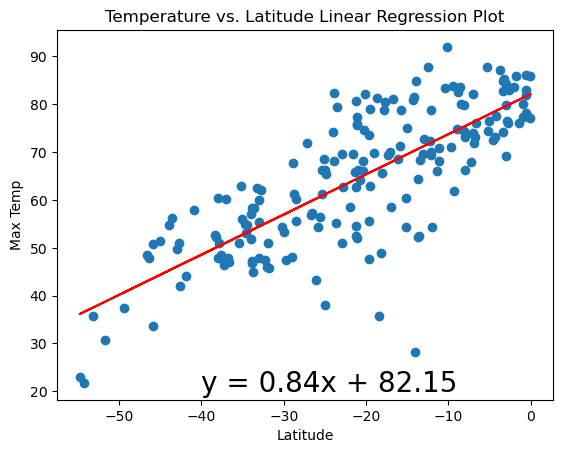

r:0.7825


In [29]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Temperature vs. Latitude Linear Regression Plot', 'Max Temp', (-40,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE